In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/brainstorming.csv')

In [3]:
df.head()

,ideas,requirement_node,label,0,1,2,3,4,5,6,...,17,18,19,20,21,22,23,24,25,26
0,"Screens on shopping carts provide recs, distra...",N,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,In aisle screens that detect user's presence a...,N,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Ease of use,Y,2,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,Digital wine glasses,N,3,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Pair with Coravin system for experienced users,N,4,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
index = df['label']
df1 = df.set_index(index)
df1 = df1.drop(columns=['label', 'ideas', 'requirement_node'])
display(df1.head())

graph_matrix = df1.values

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
label,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
g = nx.from_numpy_matrix(graph_matrix)

C:\Users\dbarker3\myAnaconda\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\dbarker3\myAnaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


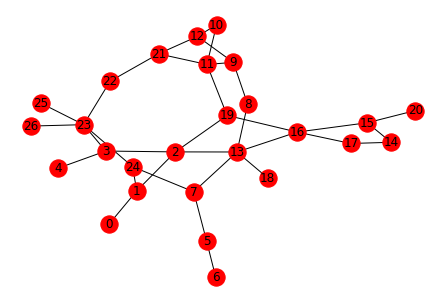

In [6]:
# Plot it
nx.draw(g, with_labels=True)
plt.show()


In [7]:
pr = nx.pagerank(g, alpha=0.85)

In [9]:
x = pd.Series([k for k in pr.keys()], name='idea_key')
y = pd.Series([j for j in pr.values()], name='page_rank')

dfp = pd.concat([x, y], axis=1)
dfp = dfp.set_index('idea_key', drop=True)
dfp = dfp.sort_values(by='page_rank', ascending=False).reset_index()

display(dfp)

,idea_key,page_rank
0,23,0.074152
1,13,0.067801
2,16,0.054479
3,2,0.053770
4,11,0.051326
5,15,0.046575
6,3,0.045194
7,1,0.044832
8,7,0.044672
9,24,0.043521


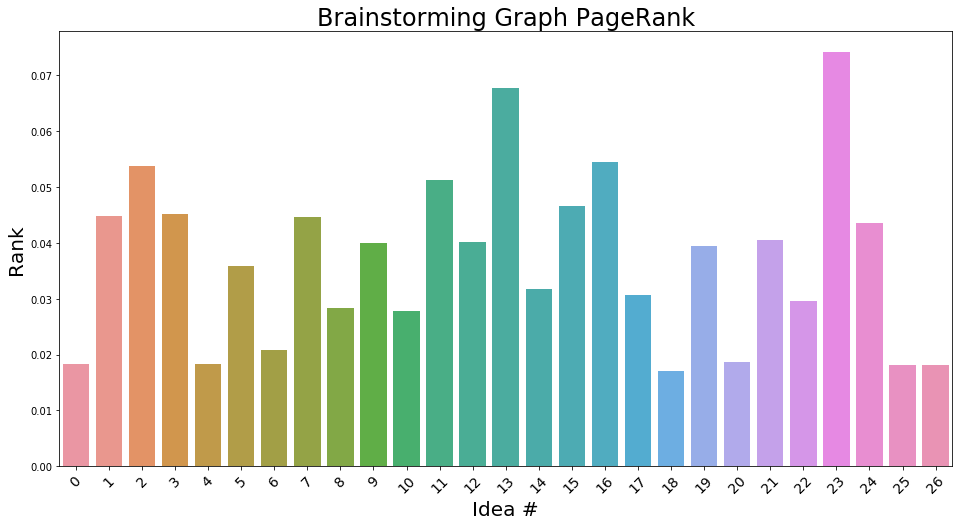

In [24]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x='idea_key', y='page_rank', data=dfp, ax=ax)
ax.set_ylabel('Rank', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
ax.set_xlabel('Idea #', fontsize=20)
plt.title('Brainstorming Graph PageRank', fontsize=24)
plt.show()
plt.close()

### Filter out nodes flagged as requirements

i.e. get only ideas.

In [29]:
dfpp = dfp.set_index('idea_key')
dfj = pd.concat([df, dfpp], axis=1).sort_values(by='page_rank', ascending=False)
dfj.head()

,ideas,requirement_node,label,0,1,2,3,4,5,6,...,18,19,20,21,22,23,24,25,26,page_rank
23,Learning,Y,23,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,1,1,0.074152
13,Discrete notifications on smart watch for recs...,N,13,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.067801
16,Awareness/Reminders/Notifications,Y,16,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.054479
2,Ease of use,Y,2,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.053770
11,Food Pairing,Y,11,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0.051326


In [32]:
dfi = dfj.loc[dfj['requirement_node'] == 'N']

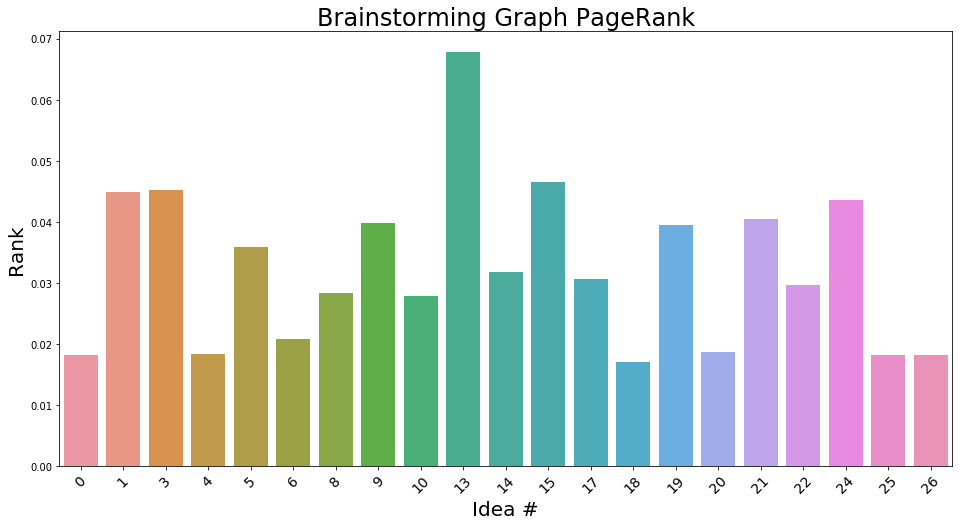

In [34]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=dfi.index, y='page_rank', data=dfi, ax=ax)
ax.set_ylabel('Rank', fontsize=20)
plt.xticks(rotation=45, fontsize=14)
ax.set_xlabel('Idea #', fontsize=20)
plt.title('Brainstorming Graph PageRank', fontsize=24)
plt.show()
plt.close()

In [35]:
display(dfi)


,ideas,requirement_node,label,0,1,2,3,4,5,6,...,18,19,20,21,22,23,24,25,26,page_rank
13,Discrete notifications on smart watch for recs...,N,13,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.067801
15,Use geolocation to provide relevant recs when ...,N,15,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.046575
3,Digital wine glasses,N,3,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.045194
1,In aisle screens that detect user's presence a...,N,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.044832
24,Popular celebrities for male audience giving r...,N,24,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.043521
21,Take picture of meal at home/restaurant and wi...,N,21,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.040424
9,Take picture of groceries in car and app retur...,N,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.039902
19,RFID in wine fridge to alert users they might ...,N,19,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.039466
5,Social network for wine recs,N,5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.035906
14,Smart watch notifications,N,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.031771


In [36]:
dfi.to_csv('brainstorming_ranked.csv')